# **Building a Regression Model for HDAC Inhibitors using Random Forest Model**

# Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Loading the Dataset

In [ ]:
df = pd.read_csv('/content/hdac_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.823909
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.552842
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.709965
2673,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.085657
2674,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.554396
2675,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000


# Input Features

In [ ]:
X = df.drop('pIC50', axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2673,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2674,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2675,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Output Features

In [ ]:
Y = df.pIC50
Y

,pIC50
0,3.823909
1,3.000000
2,4.000000
3,6.552842
4,4.000000
...,...
2672,5.709965
2673,5.085657
2674,5.554396
2675,3.000000


# Data Dimensions

In [ ]:
X.shape

(2677, 881)

In [ ]:
Y.shape

(2677,)

# Removing the Low Variance Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X=selection.fit_transform(X)

In [ ]:
X.shape

(2677, 139)

All the variables in pubchem fingerprints having low variance were removed and the number decreased from 881 to 134

# Include In Research Paper

# **Data Split (80/20) Ratio**

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X_train.shape, Y_train.shape

((2141, 139), (2141,))

In [ ]:
X_test.shape, Y_test.shape

((536, 139), (536,))

# **Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5109217670312092

In [ ]:
Y_pred = model.predict(X_test)

# **Scatter Plot of Experimental vs Predicted pIC50 values**

*   List item
*   List item



<function matplotlib.pyplot.show(close=None, block=None)>

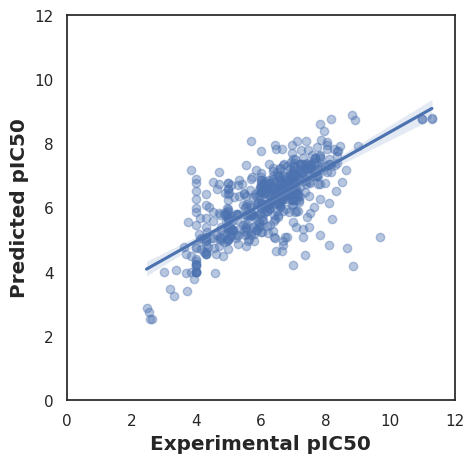

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x= Y_test, y= Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show